<a href="https://colab.research.google.com/github/gnatnib/machine_learning_practicum/blob/main/Pertemuan03/AgglomerativeClustering_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Library**

In [4]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

#**Load Dataset**

In [5]:
df = pd.read_csv('/content/sample_data/cars_clus.csv')

print("Data shape: ", df.shape)
df.head()

Data shape:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


#**Data Cleaning**

In [6]:
print("Shape of dataset before cleaning: ", df.size)

# Convert columns to numeric using pd.to_numeric
df[['sales', 'resale', 'type', 'price', 'engine_s',
    'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
    'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
    'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
    'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Drop NA values and reset index
df = df.dropna()
df = df.reset_index(drop=True)

print("Shape of dataset after cleaning: ", df.size)
df.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [7]:
featureset = df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
X = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

#**Clustering Menggunakan SciPy - Single Linkage**

In [9]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [10]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'single')

<ipython-input-10-f3a0043c729f>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'single')


In [11]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

#**Dendogram**

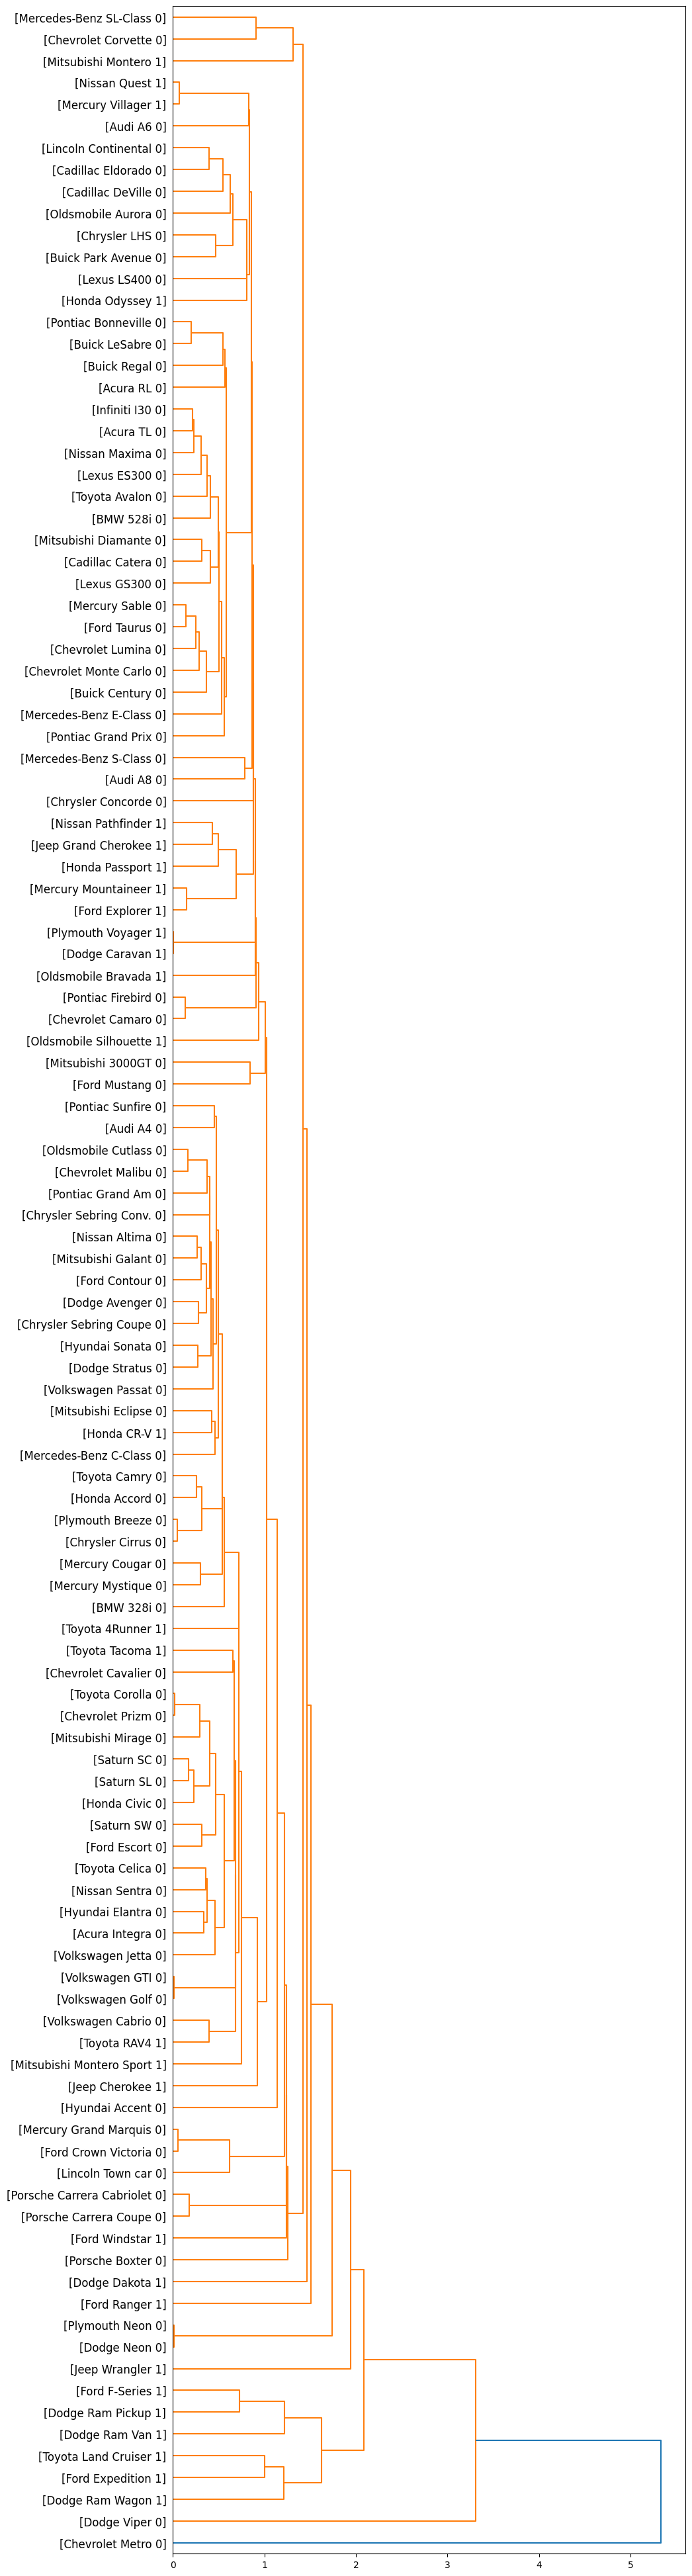

In [13]:
fig = pylab.figure(figsize=(10,50))
def llf(id):
  return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

#**Clustering Menggunakan Scikit-Learn**

In [14]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [15]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage='single')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [16]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


<ipython-input-17-a39b2fd2b231>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, subset.price * 10, c=color, label='cluster' + str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

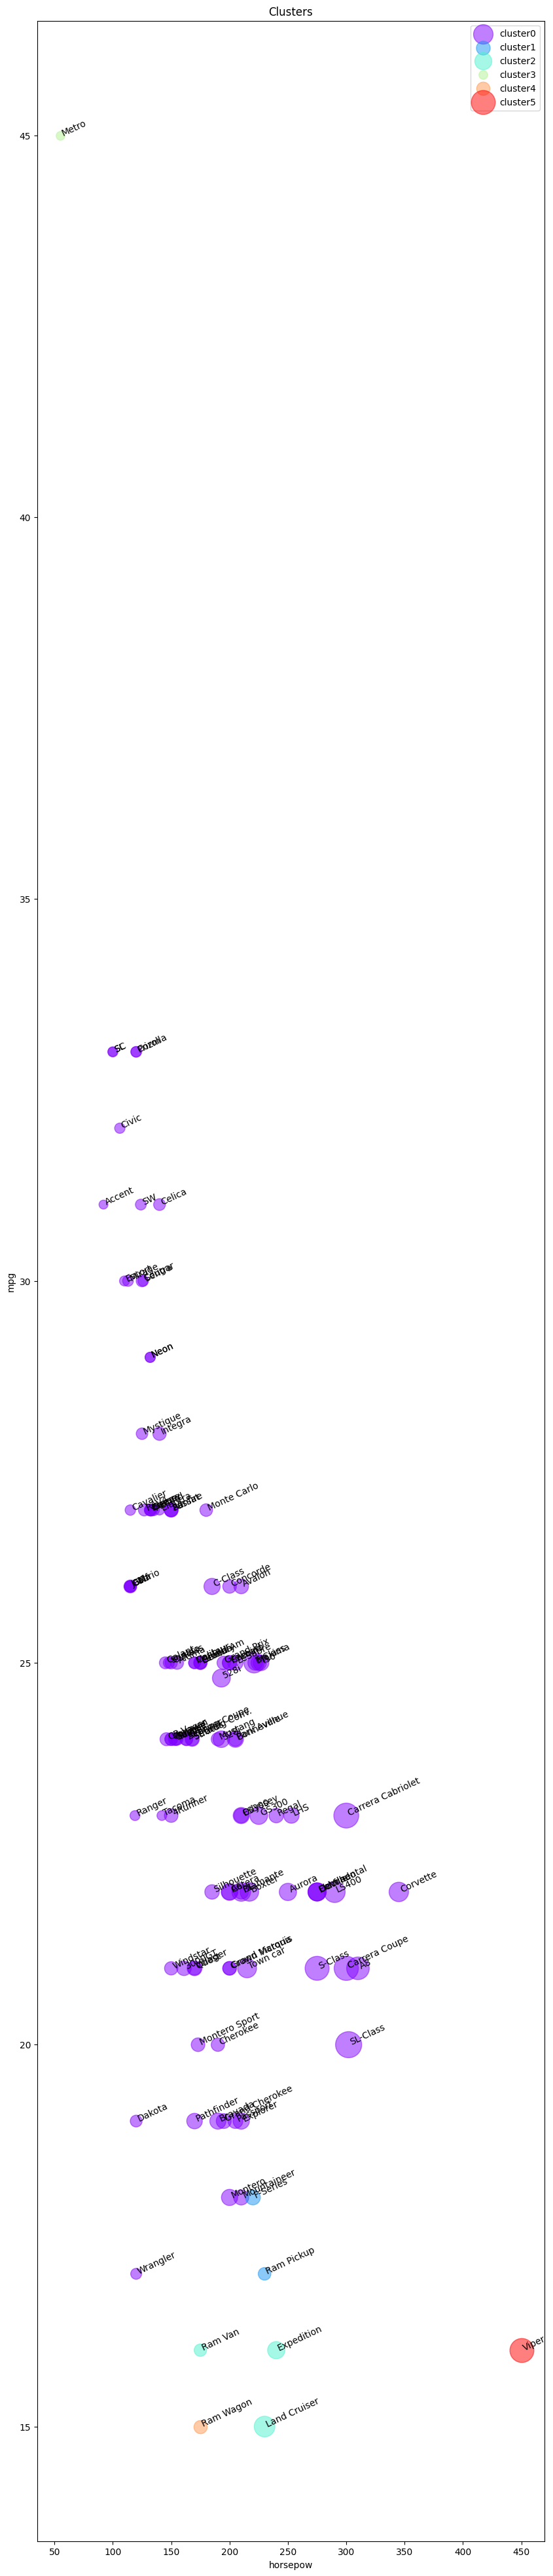

In [17]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10, 50))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(x=subset.horsepow[i], y=subset.mpg[i], s=str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, subset.price * 10, c=color, label='cluster' + str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [18]:
df.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [19]:
agg_cars = df.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

<ipython-input-20-a907ff455764>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


Text(0, 0.5, 'mpg')

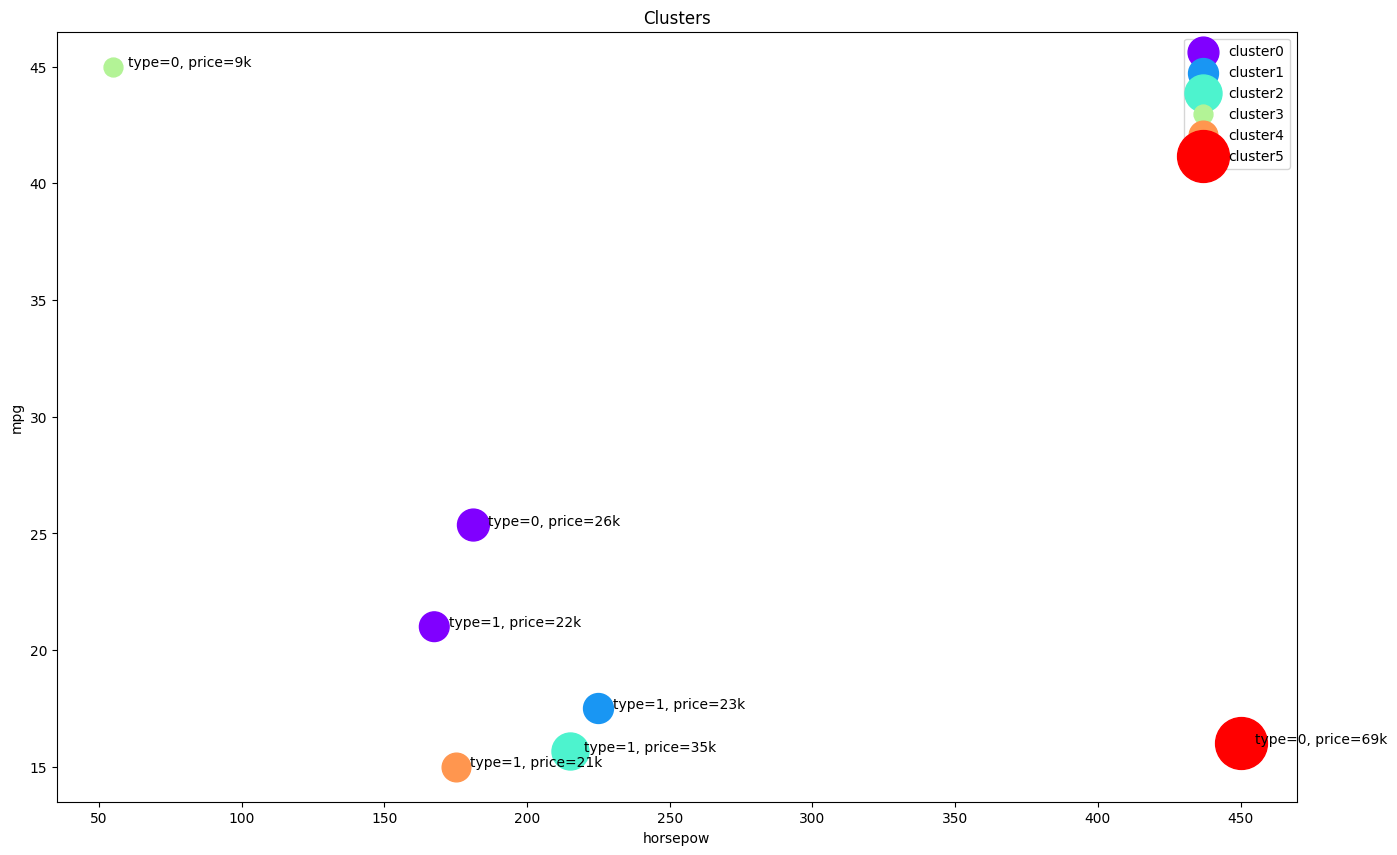

In [20]:
plt.figure(figsize=(16, 10))

for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,)]
    for i in subset.index:
        plt.text(
            x=subset.loc[i, 'horsepow'] + 5,
            y=subset.loc[i, 'mpg'],
            s='type=' + str(int(i)) + ', price=' + str(int(subset.loc[i, 'price'])) + 'k'
        )
    plt.scatter(
        subset.horsepow, subset.mpg, subset.price * 20, c=color, label='cluster' + str(label)
    )

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

#**Clustering menggunakan SciPy - Average Linkage**

In [21]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'average')

<ipython-input-21-1625b3c83ad2>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'average')


In [22]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [23]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

#**Dendogram**

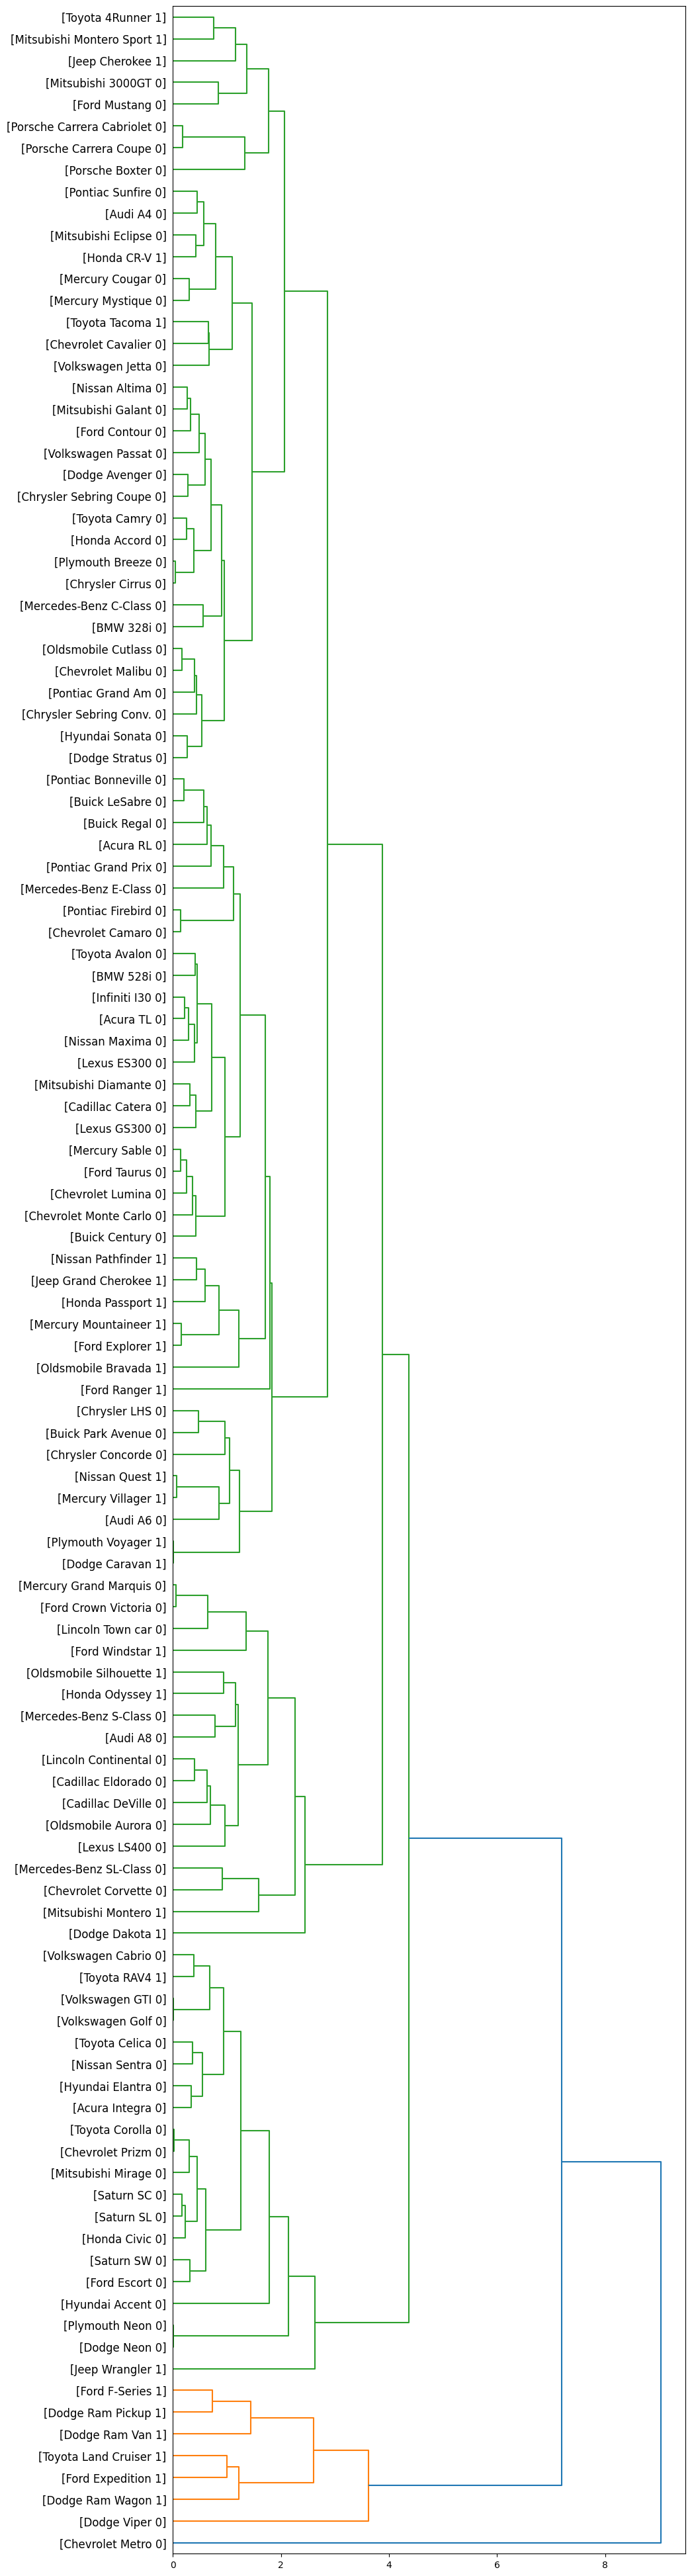

In [24]:
fig = pylab.figure(figsize=(10,50))
def llf(id):
  return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

#**Clustering menggunakan Scikit-Learn**

In [25]:
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
dist_matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [26]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage='average')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [27]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


<ipython-input-28-a39b2fd2b231>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, subset.price * 10, c=color, label='cluster' + str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

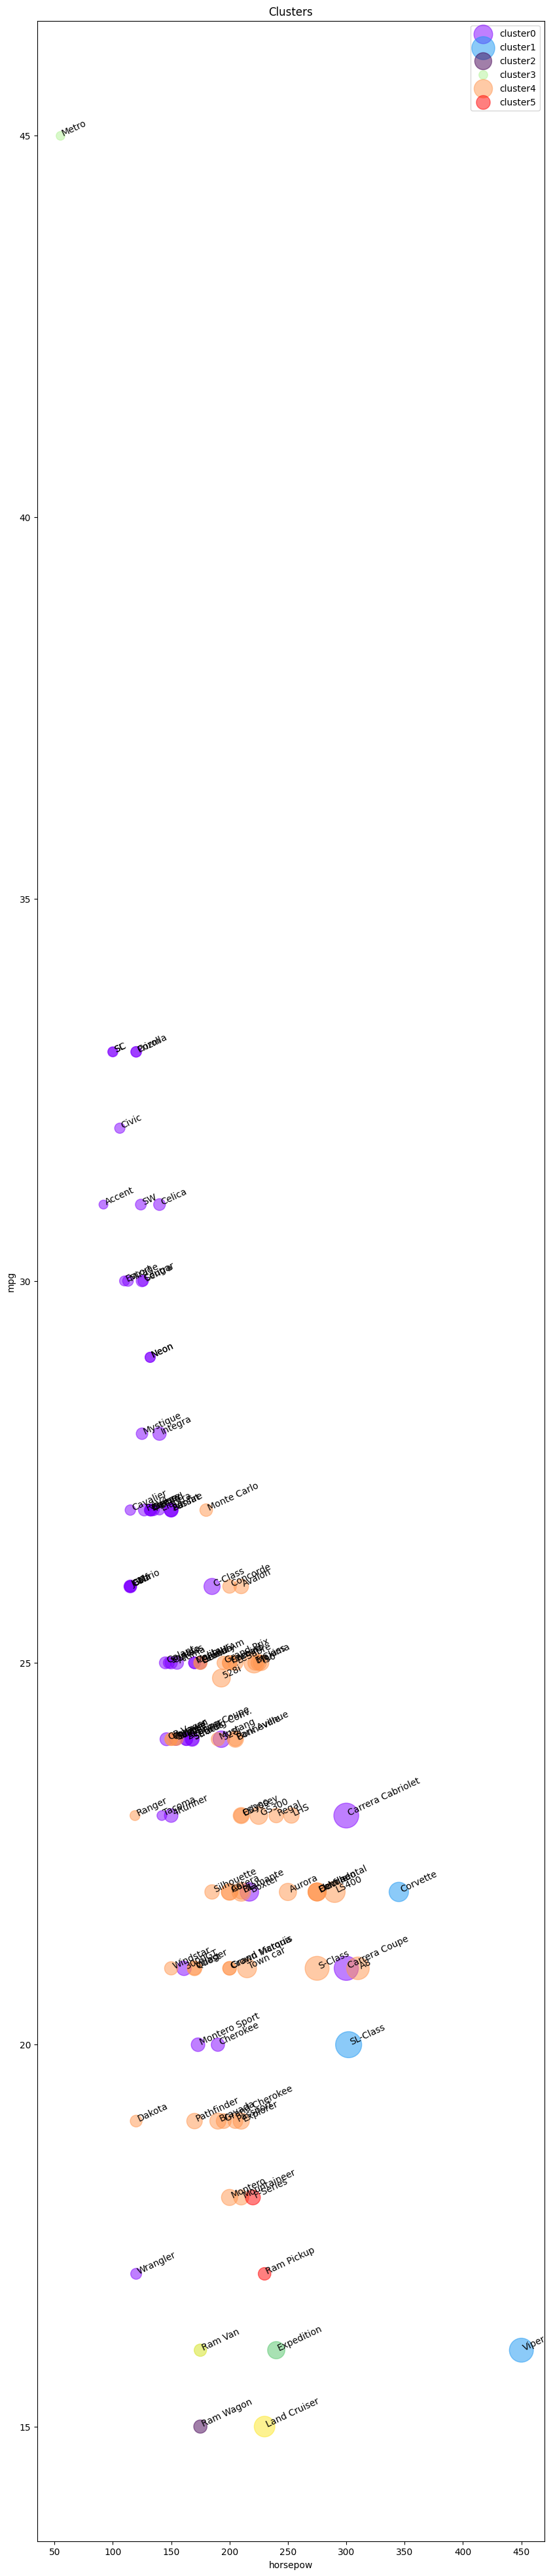

In [28]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(10, 50))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(x=subset.horsepow[i], y=subset.mpg[i], s=str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, subset.price * 10, c=color, label='cluster' + str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [29]:
df.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [30]:
agg_cars = df.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

<ipython-input-31-a907ff455764>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


Text(0, 0.5, 'mpg')

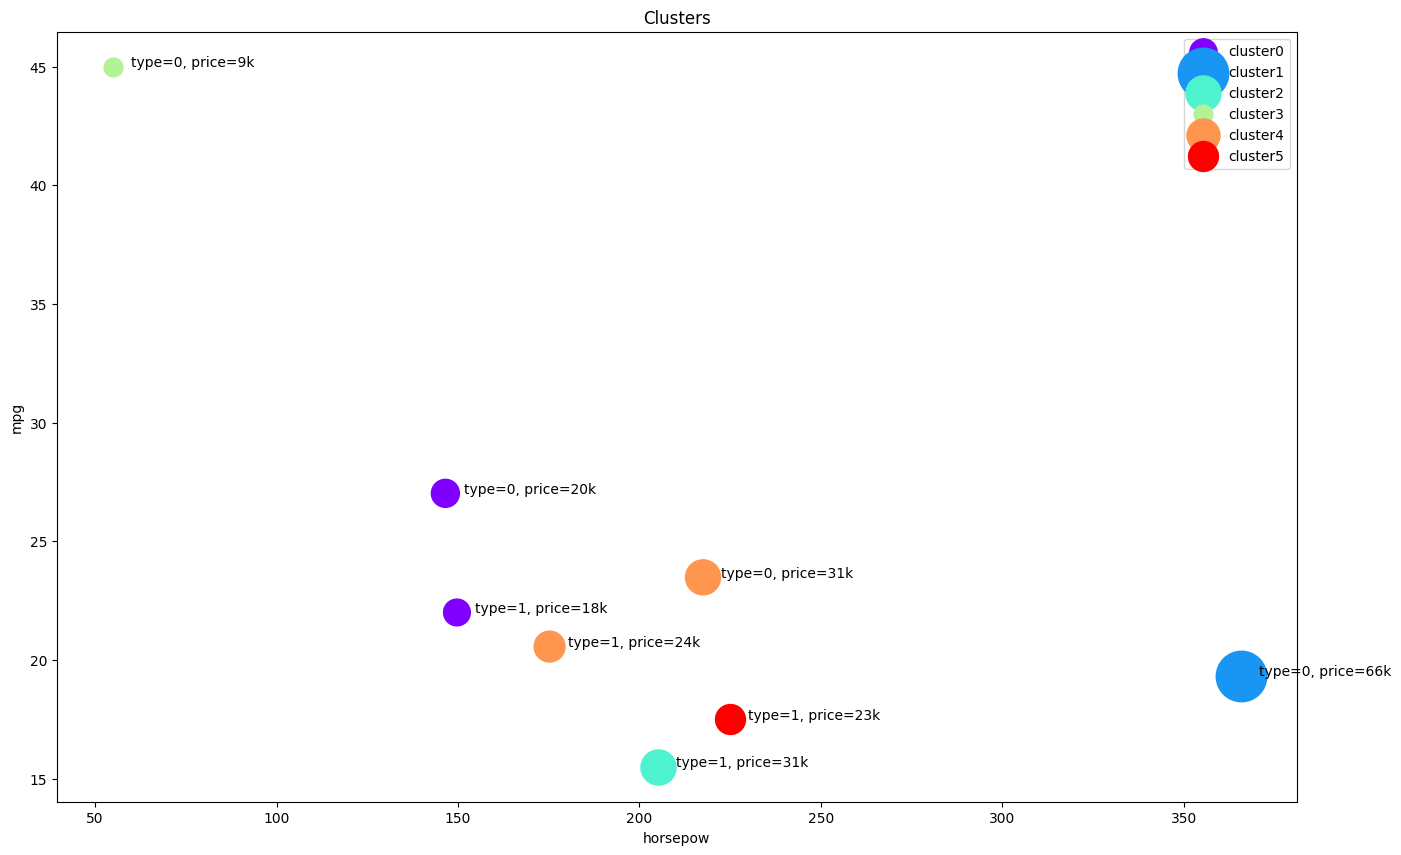

In [31]:
plt.figure(figsize=(16, 10))

for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,)]
    for i in subset.index:
        plt.text(
            x=subset.loc[i, 'horsepow'] + 5,
            y=subset.loc[i, 'mpg'],
            s='type=' + str(int(i)) + ', price=' + str(int(subset.loc[i, 'price'])) + 'k'
        )
    plt.scatter(
        subset.horsepow, subset.mpg, subset.price * 20, c=color, label='cluster' + str(label)
    )

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

#**Perbedaan Penggunaan Single Linkage dan Average Linkage**

1.   **Single Linkage**
*   Pada struktur dendogramnya, agglomerative clustering dengan single linkage membentuk rantai yang panjang, dendogram juga sangat sensitif terhadap outliernya seperti mobil mobil mewah/sport, dan cenderung membentuk cluster yang ukurannya tidak seimbang.
*   Hasil clusteringnya cenderung membentuk cluster yang ukurannya sangat besar, dan beberapa cluster kecil
*   Sangat berpengaruh terhadap noise dan outlier
*   Agak sulit dipahami karena pengelompokannya kurang natural
*   Kurang sesuai untuk analisis segmentasi pasar mobil, meskipun begitu, penggunaan single linkage cukup bagus untuk mendeteksi outlier

2.   **Average Linkage**
*   Membentuk dendogram yang lebih seimbang
*   Cluster yang terbentuk lebih natural
*   Pengelompokan mobil terlihat jelas antara mobil biasa seperti corolla, dan metro dan mobil mewah seperti Porsche, Mercedes
*   Pengelompokannya lebih masuk akal karena berdasarkan mpg dan horsepower
*   Menangkap segmentasi pasar mobil dengan lebih baik, dimana ada cluster mobil ekonomis (mpg tinggi, horsepower rendah), mobil menengah (mpg, horsepower hampir seimbang), dan mobil mewah(mpg rendah, horsepower tinggi)



#**Principal Component Analysis**

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dfpca = pd.read_csv('/content/sample_data/water_potability.csv')

In [33]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
           'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [34]:
for column in features:
    dfpca[column] = dfpca[column].fillna(dfpca[column].median())

In [35]:
X = dfpca[features]
y = dfpca['Potability']

#**Scale the Features**

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#**Lakukan PCA**

In [37]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

In [38]:
finalDf = pd.DataFrame(data=principalComponents,
                      columns=['Principal Component 1', 'Principal Component 2'])
finalDf['Potability'] = y

#**Scatter Plot**

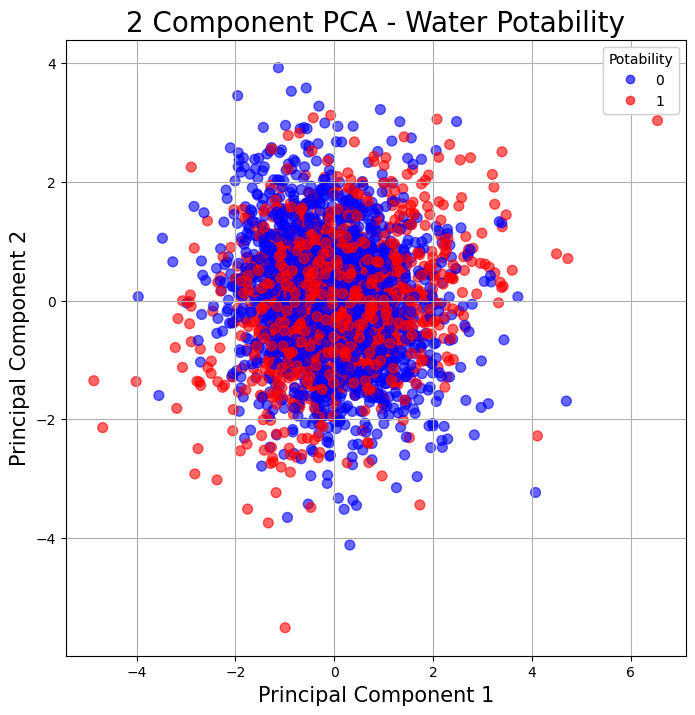

In [39]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA - Water Potability', fontsize=20)
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1],
                    c=y, cmap='bwr', alpha=0.6, s=50)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Potability")
ax.add_artist(legend1)

# Add grid
ax.grid(True)

plt.show()

In [40]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("\nFeature contributions to principal components:")
print(loadings)

# Print explained variance ratio for each component
print("\nExplained variance ratio:")
print(f"Principal Component 1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"Principal Component 2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")


Feature contributions to principal components:
                      PC1       PC2
ph              -0.314897  0.552808
Hardness         0.010587  0.626197
Solids           0.669256 -0.057778
Chloramines     -0.254214 -0.320848
Sulfate         -0.586589 -0.308082
Conductivity     0.078598  0.055649
Organic_carbon  -0.106662  0.200161
Trihalomethanes  0.008944 -0.003602
Turbidity        0.162720 -0.240644

Explained variance ratio:
Principal Component 1: 0.133
Principal Component 2: 0.126
Total variance explained: 0.260


In [41]:
pca.explained_variance_ratio_

array([0.13337387, 0.12632612])